In [1]:
from primitive import *
import scipy
import numpy as np

<class 'primitive.Sphere'>


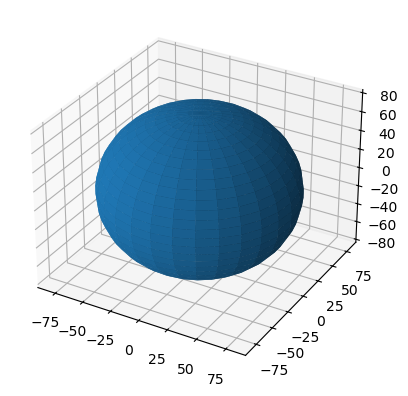

In [2]:
S = Sphere(3)
E = 80*S
print(type(E))
E.plot()

1


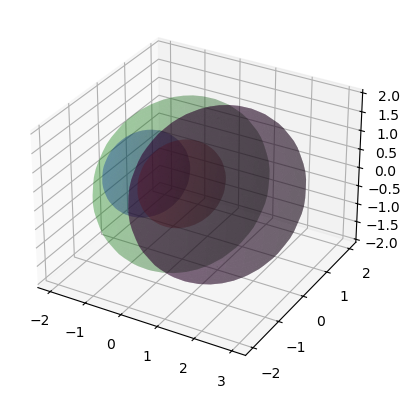

In [3]:
%matplotlib inline

S = Sphere(3)
S.plot(color="red", alpha=0.2)

(S-[1,0,0]).plot(color="blue", alpha=0.2)
(2*S).plot(color="green", alpha=0.2)
(2*S + [1,0,0]).plot(color="purple", alpha=0.2)
(2*(S + [1,0,0])).plot(color="black", alpha=0.2)
print(S.radius)

0.0018465000030118972
0.0004726999904960394


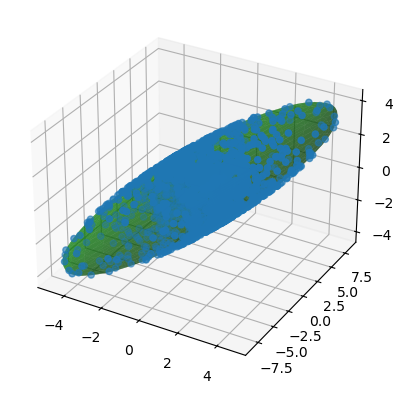

In [4]:
%matplotlib inline

from timeit import default_timer

fig, ax = plt.subplots(1,1,subplot_kw={"projection": "3d"})

# print(ax)
radii = [2,2,10]
rot = np.linalg.svd(np.random.uniform(-1,1,size=(3,3)))[0]
E2 = rot @np.diag(radii) @ Sphere(3)
# x1, x2 = E2.inter_with_line(np.array([1,1,0]))

nb_lines = 1000
directions = np.random.uniform(-1,1, (3,nb_lines)) 
directions = directions / np.linalg.norm(directions, axis=0)
lines = [Line(directions[:,i]) for i in range(nb_lines)]
s = default_timer()
points = E2.inter(lines)
print(default_timer() - s)
s = default_timer()
points = E2.inter_with_line(directions)
print(default_timer() - s)

ax.scatter(points[0], points[1], points[2])
E2.plot(color="green", alpha=0.5)


3 0 3 3


(-2.1994792036280195, 2.1994792036280195)
(-1.1, 1.1)
(-10.922406372986973, 10.980940829534962)


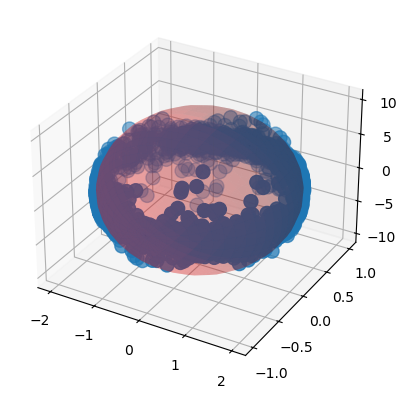

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1,1,subplot_kw={"projection": "3d"})
E = np.diag([2,1,10])*Sphere(3)
print(E.dim, E.codim, E.dim_domain, E.dim_codomain)
E.plot(ax, alpha=0.2, color="red")

points = E.inter_with_line(directions)
ax.scatter(*points, s=100)
print(ax.get_xlim())
print(ax.get_ylim())
print(ax.get_zlim())

In [6]:
%matplotlib qt5
E = np.diag([2,1,1]) @ Sphere(3) + [0,0,0]
E.plot(alpha=0.7)

c = np.array([0,1,1])
H = HyperPlane.from_normal(c, [0,0,0])
c = H.normal
print(H.d/np.sqrt(c.dot(c))*S@c)
TRANS = (H.d/np.sqrt(c.dot(c)))*c
# Retrieve a matrix S such that [1,0,0,...] = S@normal
u, _, _ = np.linalg.svd(np.hstack([c.reshape((-1, 1)), H.basis]))
S = u.T
if (S@c)[0] < 0: S = -S

H_1 = S @ H + (-(H.d/np.sqrt(c.dot(c)))*S@c)
E_no_location = Ellipsoid(E.matrix)
E_1 = S @ E_no_location + (E.location - (H.d/np.sqrt(c.dot(c))*S@c).reshape((-1,1)))



M = np.linalg.inv(E_1.Q)
m11 = M[0,0]
mb = M[1:,0].reshape(-1)
Mb = M[1:,1:]
Mb_inv = np.linalg.inv(Mb)
qp = E_1.location.reshape(-1)
qp1 = qp[0]

wp = qp + qp1 * np.hstack([[-1], Mb_inv@mb])
Wp = np.zeros_like(M)
Wp[1:, 1:] = Mb_inv
Wp = (1 - qp1**2 * (m11 - mb.dot(Mb_inv @ mb))) * Wp

w = S.T @ wp + (H.d/np.sqrt(c.dot(c)))*c
W = S.T @ Wp @ S
u,s,vt = np.linalg.svd(W)
A = u @np.diag(np.sqrt(s))
E3 = Ellipsoid(np.linalg.pinv(A), w)
E3.plot(color="red")
# print(H.projection_matrix)
# print(Wp)
# print(H.basis)
# print(H.matrix)
# Hpinv = np.linalg.pinv(H.matrix)
# W_in_H = Hpinv @ W @ Hpinv.T 
# print(W_in_H)

# u,s,vt = np.linalg.svd(W_in_H)
# A = u @np.diag(np.sqrt(s))/2
# A = H.matrix @ A
# K2 = Ellipsoid(A, wp) + H.location
# K2.plot(color="red")

# K = Ellipsoid(Wp, wp)
# # print(K.Q)
# print(wp)
# print(Wp)
# u, s, vt = np.linalg.svd(np.linalg.pinv(Wp))
# A = u.T @ ((np.diag(s)))

# A = Wp[1:,1:]
# Q = np.linalg.pinv(Wp)
# u, s, vt = np.linalg.svd(Q)
# Ap = u@np.diag(s)
# t = wp[1:]
# E2 = Ellipsoid(A, t) ## Dans H
# print(Ap)

# # A = u @ np.diag(s)
# # print(np.linalg.pinv(A@A.T))

# Ei = S.T @ Ellipsoid((Ap), wp) + (H.d/np.sqrt(c.dot(c)))*c
# Ei.plot(color="green")

# u,s,vt

NotImplementedError: Cannot transform an ellipsoid on the right!

In [ ]:
# %matplotlib qt5
E = np.diag([2,1,1]) @ Sphere(3) + [1,0,0]
E.plot(alpha=0.7)

c = np.array([1,0,0])
H = HyperPlane.from_normal(c, [2,0,0])

u, _, _ = np.linalg.svd(np.hstack([c.reshape((-1, 1)), H.basis]))
S = u.T
if (S@c)[0] < 0: S = -S

K = S @ (E - H.location)
print(K.matrix)

RA2p = K.matrix
RA2p[0,:] = 0
RA2p[:,0] = 0
print(RA2p)

K2 = S.T @ Ellipsoid(RA2p) + H.location
# A2 = 
K2.plot(color="red")
print(H.projection_matrix)
print(np.linalg.pinv(H.projection_matrix))


[[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


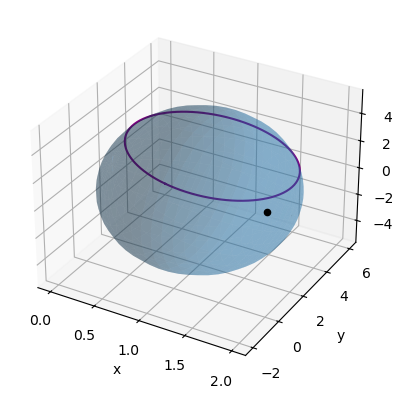

In [25]:
%matplotlib inline
#https://www.quora.com/Why-is-the-intersection-of-a-d-dimensional-sphere-and-a-hyperplane-a-d-1-dimensional-sphere
fig, ax = plt.subplots(1,1,subplot_kw={"projection": "3d"})

H = HyperPlane.from_normal([8,1.5,8], [2,0,2])
ax.scatter(*H.location.reshape(-1), c="black")

# v1 = H.basis[:,0] + H.location.reshape(-1)
# v2 = H.basis[:,1] + H.location.reshape(-1)

# Xs = np.random.uniform(-3,3, 50)
# Ys = np.random.uniform(-3,3, 50)
# H_as_ell = 2 * H.matrix @ Sphere(2) + H.location
# H_as_ell.plot(ax, color="black")
# ax.plot([H.location[0], v1[0]], [H.location[1], v1[1]], [H.location[2], v1[2]], c="black")
# ax.plot([H.location[0], v2[0]], [H.location[1], v2[1]], [H.location[2], v2[2]], c="black")
E = np.diag([1,4,5]) @ Sphere(3) + [1,2,0]
E.plot(ax, alpha = 0.3)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

E_inter_H = E.inter_with_hyperplane(H)
E_inter_H.plot(ax, color="purple")

In [143]:
print(H.normal.sum())
print(H1.normal.sum())
print(H2.normal.sum())
print(H.dim)
print(H.d, H1.d, H2.d)

1.0334693417320482
1.0208737417723224
-0.9999999999999997
2
399.10410755248324 0.7742324017309159 -0.7742324017309157


In [141]:
%matplotlib qt5
fig, ax = plt.subplots(1,1,subplot_kw={"projection": "3d"})

H = HyperPlane.from_normal([1,1,0], [1.2,0,0])
ax.scatter(*H.location.reshape(-1), c="black")

v1 = H.basis[:,0] + H.location.reshape(-1)
v2 = H.basis[:,1] + H.location.reshape(-1)


Xs = np.random.uniform(-3,3, 50)
Ys = np.random.uniform(-3,3, 50)
H_as_ell = 2 * H.matrix @ Sphere(2) + H.location
H_as_ell.plot(ax, color="black")
ax.plot([H.location[0], v1[0]], [H.location[1], v1[1]], [H.location[2], v1[2]], c="black")
ax.plot([H.location[0], v2[0]], [H.location[1], v2[1]], [H.location[2], v2[2]], c="black")
E = Sphere(3)

E.plot(ax, alpha = 0.3)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# NEW AGAIN
# 1. Deform the hyperplane
H1 = np.linalg.inv(E.matrix) @ (H + (-E.location))

# 2. Rotate H2 to have his normal align to the z-axis (The sphere is not rotated then)
u, _, vt = np.linalg.svd(np.hstack([H1.normal.reshape((-1, 1)), H1.basis]))
R = (u @ vt).T
H2 = R @ H1 # In here, the normal is x1 = d2

print(H.normal, H.d)
print(H1.normal, H1.d)
print(H2.normal, H2.d)
# S2 = (1-H2.d**2/1.633) * np.identity(H.dim+1)[:,1:] @ Sphere(H.dim)
S2 = (1-H2.d**2/np.abs(H1.normal.sum())) * np.identity(H.dim+1)[:,1:] @ Sphere(H.dim)
l = H2.project(S2.location)
S3 = R.T @ (S2 + l)
E_inter = E.matrix @ S3 + E.location

E_inter.plot(ax, color="red")
ax.scatter(*E_inter.location, color="red")
s = E_inter.matrix @ Sphere(2).sample(100) + E_inter.location
print(E.eval(s))

[-0.70710678 -0.70710678  0.        ] -0.8485281374238569
[-0.70710678 -0.70710678  0.        ] -0.8485281374238569
[1.00000000e+00 1.11022302e-16 0.00000000e+00] -0.848528137423857
[0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624 0.96096624
 0.96096624 0.

c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numpy\lib\stride_tricks.py:342: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)
c:\Users\glaisne\mambaforge\envs\workspace\Lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or

In [140]:
print(H.normal.sum())
print(H1.normal.sum())
print(H2.normal.sum())
print(H.dim)
print(H.d, H1.d, H2.d)

-1.414213562373095
-1.414213562373095
1.0
2
-0.8485281374238569 -0.8485281374238569 -0.848528137423857


In [74]:
# Normal in sphere
u = np.linalg.inv(E.matrix) @ H.normal
print(E.matrix @ u)
print(H.normal)

# Centre SphereInter mapping to center of ellipsoid
print(p) 
pp = np.linalg.inv(E.matrix) @ p - E.location.reshape(-1)
print(E.matrix @ (pp))
print(p - E.location.reshape(-1))

[-0.70710678 -0.70710678  0.        ]
[-0.70710678 -0.70710678  0.        ]
[ 0.18772307 -2.74143465  0.        ]
[-0.81227693 -2.74143465  0.        ]
[-0.81227693 -2.74143465  0.        ]


In [89]:
Ep = E.matrix @ Sphere(3) + E.location
print(Ep.matrix, Ep.location)
print(E.matrix, E.location)
US = np.linalg.inv(E.matrix) @ (E - E.location)

Hp = np.linalg.inv(E.matrix) @ (H + (-E.location))
center_sphere_on_Hp = Hp.project(US.location)
print(center_sphere_on_Hp)
print(E.matrix @ center_sphere_on_Hp)
print(p-E.location.reshape(-1))
print(p)

[[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 2.]] [[1.]
 [0.]
 [0.]]
[[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 2.]] [[1.]
 [0.]
 [0.]]
[[0.23076923]
 [0.34615385]
 [0.        ]]
[[0.46153846]
 [1.03846154]
 [0.        ]]
[-0.81227693 -2.74143465  0.        ]
[ 0.18772307 -2.74143465  0.        ]


In [7]:

# A = np.diag([1,1,0]) @ Sphere(3)
matrix = np.diag([1,1,0])
u, s, _ = np.linalg.svd(matrix)
# L = scipy.linalg.orth(u@np.diag(s))
s_ = np.zeros(u.shape)
print(s)
s_[:len(s), :len(s)] = np.diag(s)
L = u@s_
print(L)

[1. 1. 0.]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


[[-3.86497096  0.         -0.03153558]
 [-6.86491062  0.         -0.65758186]
 [-6.15913969  0.          0.75272279]]
2


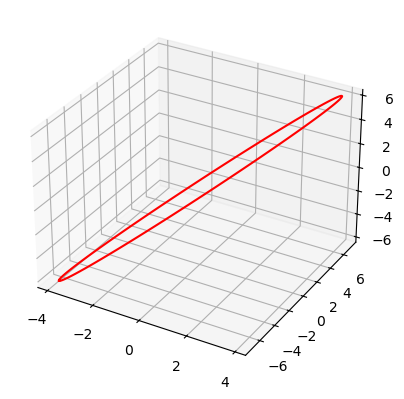

In [8]:
%matplotlib inline
rot = np.linalg.svd(np.random.uniform(-1,1,(3,3)))[0]
M = np.diag([10,0,1])
print(rot @ M)
print(np.linalg.matrix_rank(rot @ M))
u,s,vt = np.linalg.svd(rot @ M)
E = rot @ M @ Sphere(3)

E.plot(color="red")


[[1 2 3 4]
 [1 4 8 3]
 [1 2 3 4]]


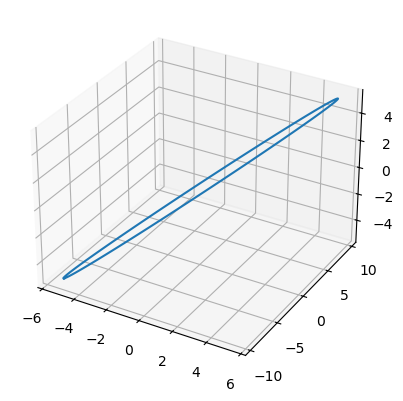

In [9]:
%matplotlib inline
A= np.array([[1,2,3,4], [1,4,8,3], [1,2,3,4]])
print(A)
E = Ellipsoid(A)
E.plot()

[[1 2]
 [1 4]
 [1 9]]
2 3


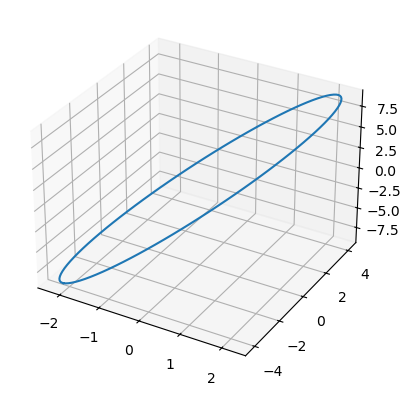

In [10]:
%matplotlib inline
A= np.array([[1,2], [1,4], [1,9]])
print(A)
E = Ellipsoid(A)
print(E.dim, E.dim_codomain)
E.plot()

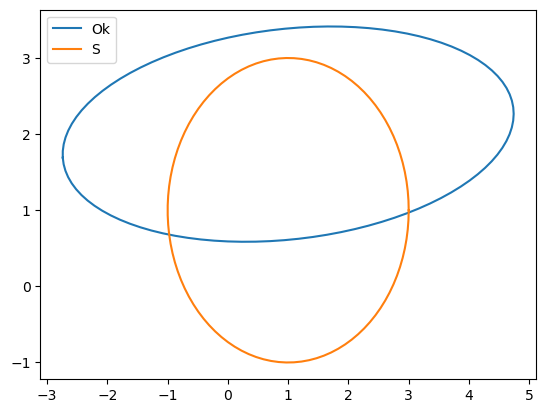

In [16]:
%matplotlib inline
A = np.array([[-1,2,0,3], [1,1,0,0]])
E = Ellipsoid(A, location=[1,2])
E.plot(label="Ok")
Sphere(2, 2, [1,1]).plot(label="S")
plt.legend()

[[-1  2  0  3]
 [ 1  1  0  0]
 [ 1  1  1  0]]
3 3


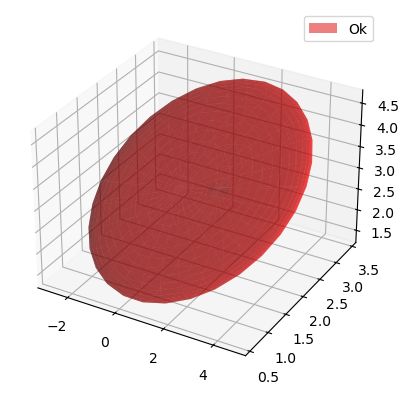

In [17]:
%matplotlib inline
A = np.array([[-1,2,0,3], [1,1,0,0], [1,1,1,0]])
print(A)
E = Ellipsoid(A, location=[1,2,3])
print(E.dim, E.dim_codomain)
E.plot(label="Ok", alpha=0.5, color="red")
plt.legend()

[[4 0]
 [0 2]
 [0 0]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[4. 2.]


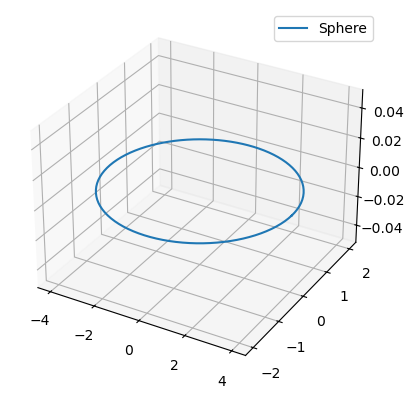

In [18]:
print(np.array([[1,0], [0,1], [0,0]]) @np.diag([4,2]))
Q = np.array([[1,0], [0,1], [0,0]]) @np.diag([4,2])
u,s,vt = np.linalg.svd(Q)
print(u)
print(s)
S = np.array([[1,0], [0,1], [0,0]]) @ np.diag([4,2]) @ (Sphere(2))
S.plot(label="Sphere")
plt.legend()

In [15]:
A = AffineSpace(np.array([[1,2,3], [1,2,2]]), [1,1])
H = HyperPlane.from_normal([1,0])
B = Line([1,2])

d = np.array([-8, 40, -44]).dot([10, -15, -50])
H = HyperPlane.from_equation([-8, 40, -44, 4], 1520)
print(type(H))
print(H.normal)
print(H.d)
L = Line([1,1,3,4], [-5,0,1.2,1])

print("H")
print(H.dim, L.dim)


<class 'primitive.HyperPlane'>
[-0.13303802  0.66519011 -0.73170912  0.06651901]
25.27722399903408
H
3 1


In [5]:
d = np.array([-8, 40, -44]).dot([10, -15, -50])
H = HyperPlane.from_equation([-8, 40, -44, 4], 1520)
print(type(H))
print(H.normal)
print(H.d)
L = Line([1,1,3,4], [-5,0,1.2,1])
# print(L.direction)
# print(L.location)
Inter = H.inter(L)
Inter = L.inter(H)
print(Inter.basis)
print(Inter.location)

<class 'primitive.HyperPlane'>
[-0.13303802  0.66519011 -0.73170912  0.06651901]
25.27722399903408
[]
[[-23.2]
 [-18.2]
 [-53.4]
 [-71.8]]


In [6]:
E1 = HyperPlane.from_normal([-2.8, 4.10, -44], [0.06, -0.08, 0.87])
L = Line([1,1,3], [-5,0,1.2])
print(L.project([-5,0,1.2]))
I = E1.inter(L)
print(I) # Null
print(I.basis)
print(I.matrix)

print(E1.dual().project([1,1,3]))

O1 = E1.project([0,0,0])
print(O1)
O2 = L.project([0,0,0])
print(O2)
print(O1+O2)
O3 = L.project([0,0,0])
# SHOULD FIND: [136.31, -27.26, -32.71]

[[-5. ]
 [ 0. ]
 [ 1.2]]
[]
[[0.]
 [0.]
 [0.]]
[[ 0.19127646]
 [-0.27222625]
 [ 2.93291587]]
[[ 0.05537592]
 [-0.08108617]
 [ 0.87019305]]
[[-4.87272727]
 [ 0.12727273]
 [ 1.58181818]]
[[-4.81735135]
 [ 0.04618656]
 [ 2.45201123]]


In [ ]:
E1 = HyperPlane.from_normal([-2.8, 4.10, -44], [0.06, -0.08, 0.87])
L = Line([1,1,3], [-5,0,1.2])

I = E1.inter(L)
print(I) # Null

print(E1 in L)

print(E1.dual().project([1,1,3]))
print(L in E1)

O1 = E1.project([0,0,0])
print(O1)
O2 = L.project([0,0,0])
print(O2)
print(O1+O2)
O3 = L.project([0,0,0])
# SHOULD FIND: [136.31, -27.26, -32.71]

True
[[ 0.19127646]
 [-0.27222625]
 [ 2.93291587]]
True
[[ 0.05537592]
 [-0.08108617]
 [ 0.87019305]]
[[-4.87272727]
 [ 0.12727273]
 [ 1.58181818]]
[[-4.81735135]
 [ 0.04618656]
 [ 2.45201123]]


In [19]:
A = HyperPlane.from_normal([-8, 40, -44], [10, -15, -50])
A = HyperPlane(A.matrix.round(), A.location)
L = Line([1,1,3], [-5,0,1.2])

Inter = A.inter(L)
print(type(Inter))
print(Inter.basis)
print(Inter.location)

B = HyperPlane.from_normal([80, 4, -4], [-1, -5, -5])
print(B.basis)
Inter = A.inter(B)
Inter = B.inter(A)
print(Inter)
print(Inter.basis)
print(Inter.location)

<class 'primitive.AffineSpace'>
[]
[[-12.06666667]
 [ -7.06666667]
 [-20.        ]]
[[-0.04987547 -0.04987547]
 [-0.00124533  0.99875467]
 [-0.99875467  0.00124533]]
[[ 0.        ]
 [-0.70710678]
 [-0.70710678]]
[[ -2.14285714]
 [ 11.42857143]
 [-11.42857143]]


In [10]:
A = HyperPlane.from_normal([-8, 40, -44], [10, -15, -50])
L = Line([1,1,3], [-5,0,1.2])

Inter = A.inter(L)
print(Inter.basis)
print(Inter.location)

[]
[[-20.328]
 [-15.328]
 [-44.784]]


In [239]:
normal = np.array([-8, 40, -44])
N = VectorSpace(normal)
plan = N.orthogonal_complement()
print(plan.round())
A = AffineSpace(plan.round(), point=[10, -15, -50])
L = AffineSpace([1,1,3], [-5,0,1.2])

Inter = A.inter(L)
print(Inter.basis())
print(Inter.point)

[[ 1. -1.]
 [ 1.  0.]
 [ 0.  1.]]
[]
[[-12.06666667]
 [ -7.06666667]
 [-20.        ]]


In [433]:
B = HyperPlane.from_normal([80, 4, -4], [-1, -5, -5])

Inter = A.inter(B)
print(Inter.basis())
print(Inter.location)

[[-8.16496581e-01  1.66533454e-16]
 [-4.08248290e-01 -7.07106781e-01]
 [ 4.08248290e-01 -7.07106781e-01]]
[[ 0.        ]
 [-0.70710678]
 [-0.70710678]]
[[ -1.]
 [ 12.]
 [-12.]]


In [208]:
sol = np.array([-5,0,1.2]).reshape((-1,1))
print(E1.projection_matrix() @(sol-E1.point))
print(sol-E1.point)
print(L.projection_matrix() @ (sol-L.point))
print(sol-L.point)


print((E1.projection_matrix() - np.identity(3)) @(sol-E1.point))
# print(sol-E1.point)
print((L.projection_matrix() - np.identity(3)) @ (sol-L.point))
print(sol-L.point)

print(E1.orthogonal_projection(sol))
print(L.orthogonal_projection(sol))


[[-5.06003427]
 [ 0.08005019]
 [ 0.3294614 ]]
[[-5.06]
 [ 0.08]
 [ 0.33]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[-3.42743478e-05]
 [ 5.01874378e-05]
 [-5.38596894e-04]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[-5.00003427e+00]
 [ 5.01874378e-05]
 [ 1.19946140e+00]]
[[-5. ]
 [ 0. ]
 [ 1.2]]


In [226]:
U1 = E1.projection_matrix()
U2 = L.projection_matrix()
I3 = np.identity(3)
U = np.vstack([I3-U1, I3-U2])
x1 = E1.point
x2 = L.point
X = np.vstack([x1-U1@x1, x2-U2@x2])

Y = np.linalg.pinv(U) @ X
Y
print(Y)
print(Y.round(2))


[[-5.00018363e+00]
 [-1.83626626e-04]
 [ 1.19944912e+00]]
[[-5. ]
 [-0. ]
 [ 1.2]]


In [197]:
print(E1.point)
print(E1.projection_matrix() @ E1.point)

[[ 0.06]
 [-0.08]
 [ 0.87]]
[[ 0.00462408]
 [ 0.00108617]
 [-0.00019305]]


In [206]:
B = np.vstack([(E1.projection_matrix() - np.identity(3)), (L.projection_matrix() - np.identity(3))])
B = VectorSpace(B)
print(B.basis())
print(B.dim)
Bp = B.orthogonal_complement()

print(B.left_null_space())
print(B.left_null_space() @ (sol-E1.point))
# X = 

[[-4.47139459e-02  5.81132364e-17  4.47139459e-02]
 [ 6.54739922e-02 -1.28369537e-16 -6.54739922e-02]
 [-7.02647721e-01  7.49400542e-16  7.02647721e-01]
 [ 3.18045596e-01 -8.40705006e-01  3.18045596e-01]
 [ 5.59683842e-01  5.31600323e-01  5.59683842e-01]
 [-2.92576479e-01  1.03034894e-01 -2.92576479e-01]]
3
[[-0.95155438  0.09500698  0.2855158 ]
 [-0.00544505 -0.94404765  0.31649756]
 [ 0.06004608 -0.09401397  0.01132263]
 [ 0.09090909  0.09090909  0.27272727]
 [ 0.09090909  0.09090909  0.27272727]
 [ 0.27272727  0.27272727  0.81818182]]
[[ 0.24100817]
 [-0.35290482]
 [ 3.78727121]
 [-1.57161207]
 [-2.60477655]
 [ 1.39212954]]


In [142]:
print(E1.projection_matrix())
print(E1.basis())

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
[[ 1.  0.]
 [ 0.  0.]
 [ 0. -1.]]


In [127]:
print(P1)
x = np.array([0,0,0]).reshape((-1,1))
P1 + U1.projection_matrix() @ (x-P1)

[[ 2]
 [ 1]
 [10]]


array([[0.],
       [1.],
       [0.]])

In [126]:
print(U1.projection_matrix())
print(U1.basis())

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
[[ 1.  0.]
 [ 0.  0.]
 [ 0. -1.]]


In [441]:
U = AffineSpace([[1,0,0], 
                 [0,0,0]])

print(U.point)
(U + [1,2])
print((U + [1,2]))
print((U + [1,2]).basis())

[[0.]
 [0.]]
[[1 0 0]
 [0 0 0]][[1.]
 [2.]]
[[1.]
 [0.]]


In [221]:
U = VectorSpace([1,0, 0])
print(U.dim)
print(U.column_space)
print(U.left_null_space)

print(U.row_space)
print(U.null_space)

print(U.nullity)


1
[[1.]
 [0.]
 [0.]]
[[0. 0.]
 [1. 0.]
 [0. 1.]]
[[1.]]
[]


ValueError: zero-size array to reduction operation maximum which has no identity

In [193]:
A = AffineTransformation(np.array([[1,0,0], [0,0,0]]))

print(A.rank)
print(A.codomain.V)
print(A.domain.V)
print(A.kernel.V)
print(A.coimage.V)
print(A.image.V)
print(A.cokernel.V)

1
[[1. 0.]
 [0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0.]
 [1. 0.]
 [0. 1.]]
[[1.]
 [0.]
 [0.]]
[[1.]
 [0.]]
[[0.]
 [1.]]


In [191]:
A = VectorSpace(np.array([[1,0,0], [0,0,0]]))

print(A.rank)
print(A.codomain.V)
print(A.domain.V)
print(A.kernel.V)
print(A.coimage.V)
print(A.image.V)
print(A.cokernel.V)

AttributeError: 'VectorSpace' object has no attribute 'rank'

In [164]:
A = AffineTransformation(np.array([[1,0,0], [0,0,0]])) + [1,0]
B = np.array([[1,2], [4,5], [1,1]])

(A@B).image.V
(B@A).rank
print((B@A).T)

[[1.]
 [4.]
 [1.]]


In [103]:
A = np.array([[1,0,0], [0,0,0]])
print(A)
u,s,vt = np.linalg.svd(A)
print(s)
print(u)

print(np.linalg.matrix_rank(A))

kernel = scipy.linalg.null_space(A)
print(kernel)
print(s)
print(np.linalg.matrix_rank(A))
image = u[:, :np.linalg.matrix_rank(A)]@np.diag(s[:np.linalg.matrix_rank(A)])
print(image)
# print(u)

singular_values = np.linalg.svd(A, compute_uv=False).tolist()
singular_values = np.array(singular_values + [0 for _ in range(A.shape[1] - len(singular_values))])
print(singular_values)
print(scipy.linalg.null_space(u@np.diag(singular_values)))

[[1 0 0]
 [0 0 0]]
[1. 0.]
[[1. 0.]
 [0. 1.]]
1
[[0. 0.]
 [1. 0.]
 [0. 1.]]
[1. 0.]
1
[[1.]
 [0.]]
[1. 0. 0.]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [118]:
print("A", A)
cokernel = scipy.linalg.null_space(A.T) # Also called left nullspace. It's the orthogonal complement to the column space of A.
print("\ncokernel")
print(cokernel)

kernel = scipy.linalg.null_space(A)
print("\nkernel:")
print(kernel)

image = scipy.linalg.orth(A)
print("\nimage:")
print(image)

coimage = scipy.linalg.orth(A.T)
print("\ncoimage:")
print(coimage)

rank = np.linalg.matrix_rank(A)
print("\nrank", rank)

A [[1 0 0]
 [0 0 0]]

cokernel
[[0.]
 [1.]]

kernel:
[[0. 0.]
 [1. 0.]
 [0. 1.]]

image:
[[1.]
 [0.]]

coimage:
[[1.]
 [0.]
 [0.]]

rank 1


In [64]:
H = HyperPlane([1,1,0])
B = H.basis
print(B)
# print(scipy.linalg.orth(B))
print(H.null_space)
H.null_space.T @ B @ np.array([0,4])

u,s,vt = np.linalg.svd(B)
Im = u @ np.diag([s[0]] + [0 for _ in range(H.dim)])
print(Im)
print(scipy.linalg.orth(Im))
print(H.null_space)
# print(u)
# print(s)
# print(vt)


# u, s, vt = np.linalg.svd(H.normal)
# print(u)
# Im = u @ np.diag([s[0]] + [0 for _ in range(H.dim)])
# scipy.linalg.null_space(Im.T)

[[ 0.         -0.70710678]
 [ 0.          0.70710678]
 [ 1.          0.        ]]
[[0.70710678 0.         0.        ]
 [0.70710678 0.         0.        ]
 [0.         0.         0.        ]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]
[[0.]
 [0.]
 [1.]]
[[0.70710678 0.         0.        ]
 [0.70710678 0.         0.        ]
 [0.         0.         0.        ]]


In [167]:

A = np.array([1,0,0]).reshape(-1,1)
u,s,vt= np.linalg.svd(A)
ImA = scipy.linalg.null_space(u@np.diag([s[0], 0, 0]))
# print(ImA)
# print(scipy.linalg.orth(ImA))

D = np.array([2,3,1])
u,s,vt= np.linalg.svd(D.reshape((-1,1)))
print(s)
ImD = scipy.linalg.null_space(u@np.diag([s[0], 0, 0]))
print(ImD)

v1 = D.reshape((-1,1))
v1 = v1/ np.linalg.norm(v1)
print(v1.flatten())
D_ = np.array([1,0,0])
v2 = D_.reshape((-1,1))
print(v2.flatten())

R = np.identity(3) - 2 * np.outer(v1-v2, v1-v2) / np.linalg.norm(v1-v2)**2
# print(M)
# print(M.T@M)
print(R@v1)
print(R@v2)

Zp = Z.apply_affine_transformation(R)
M = np.linalg.inv(Zp.Q)
m11 = M[0,0]
m = M[0,1:]
Mb = M[1:, 1:]
wp = Zp.center + Zp.center[0] * np.array([-1, *(np.linalg.inv(Mb)@m)]).reshape((-1,1))
# M = 
K = np.zeros((3,3))
K[1:,1:] = np.linalg.inv(Mb)
# print(K)
Wp = (1 - Zp.center[0]**2 * (m11 - m.dot(np.linalg.inv(Mb) @ m)) ) * K
# print(Wp)
print(Wp)
print("HERE")
Wp_in_D = Wp[1:, 1:]
wp_in_D = wp[1:]
print(Wp_in_D)
u,s,vt = np.linalg.svd(ImD)
U = u @ np.diag([*s, 0])
Z_in_D = Ellipsoid(Wp_in_D, wp_in_D)
Z_in = ImD @ Z_in_D.uniform_sample(1000)
# print(ImD)
# print(Z_in.shape)


[3.74165739]
[[0. 0.]
 [0. 1.]
 [1. 0.]]
[0.53452248 0.80178373 0.26726124]
[1 0 0]
[[ 1.00000000e+00]
 [-1.66533454e-16]
 [-5.55111512e-17]]
[[0.53452248]
 [0.80178373]
 [0.26726124]]
[[    -0.             -0.             -0.        ]
 [    -0.         -72679.52675267   -860.75481998]
 [    -0.           -860.75481998 -63691.76201549]]
HERE
[[-72679.52675267   -860.75481998]
 [  -860.75481998 -63691.76201549]]


In [168]:
Z_in[:, :5]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [-90.27441976, -90.2752995 , -90.27280401, -90.27539404,
        -90.27756334],
       [ 17.3445223 ,  17.33789991,  17.34021986,  17.3449591 ,
         17.3378515 ]])

In [174]:

%matplotlib qt5
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
# ax = fig.add_subplot(1,1,1)
fig.suptitle("Force capacities parametrization by an ellipsoid.")

# plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
Z.plot(ax, color="green", alpha=0.2)
ax.plot([0, 150*D[0]], [0, 150*D[1]], [0, 150*D[2]], c="red")
Zp.plot(ax, color="blue", alpha=0.2)

ax.plot([0, 150*D_[0]], [0, 150*D_[1]], [0, 150*D_[2]], c="blue")
ax.scatter(Z_in[0,:], Z_in[1,:], Z_in[2,:])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5, 0, 'z')

In [179]:
T = Orthotope.from_bounds(t_min, t_max)
T = Orthotope(T.semi_axes_length, center=((t_max.mean()+t_min.mean()) / 2) * np.ones(m))
S = T.to_sphere(method="mean_axes", projection_constant=True)
Z = N @ S

P3 = Z.intersect_with_linear_subspace(J.T)
P3.center = np.array([0,0,0]).reshape((-1,1))
P3.center = center_pol

In [185]:
S_on_tau = (J.T @ Sphere(p)).uniform_sample(5000, 42)

K = Z.intersect_with_lines(S_on_tau)
print(K.shape)
K_on_cart = np.linalg.pinv(J.T) @ K
P2 = Polytope(vertices=K_on_cart)

(5, 2400)


using provided 3d axis
using provided 3d axis


Text(0.5, 0, 'z')

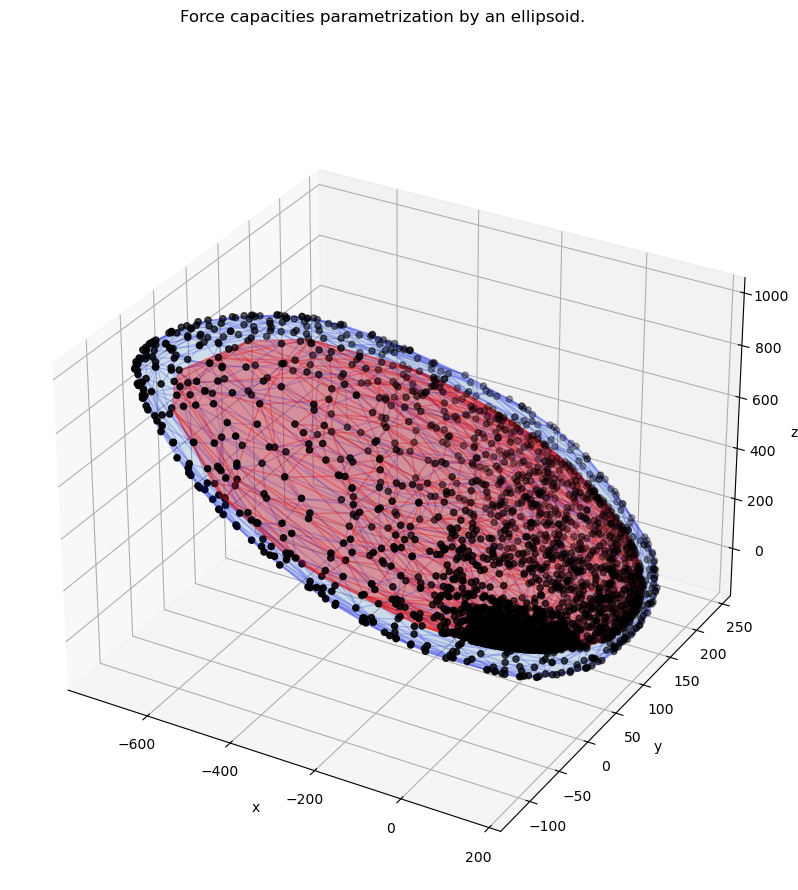

In [187]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
fig.suptitle("Force capacities parametrization by an ellipsoid.")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
plot_polytope(polytope=P2, plot=ax, edge_color="red", face_color="red", alpha=0.2)
# P3.plot(ax, color="green", alpha=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [188]:
%matplotlib qt5
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
plot_polytope(polytope=P2, plot=ax, edge_color="red", face_color="red", alpha=0.2)
P3.plot(ax, color="green", alpha=0.2)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

using provided 3d axis
using provided 3d axis


Text(0.5, 0, 'z')

In [25]:
c, gamma = np.ones(n), np.random.uniform(size=n)

def as_column_vector(C):
    return C.reshape((-1,1))
class Hyperplane:
    def __init__(self, coefficients):
        """The coefficients of an hyperplane are a_i such that:
        sum_i=1,n(a_i*x_i) + a_n+1 = 0"""
        coefficients = np.array(coefficients)
        self.coefficients = as_column_vector(coefficients)

    @property
    def direction(self):
        return self.coefficients[:-1]
    
    @property
    def b(self):
        return self.coefficients[-1][0]

    @property
    def dim(self):
        return len(self.direction)
    
    

In [30]:
H = Hyperplane([1,2,3,5])
print(H.dim)
print(H.direction.T @ H.direction)
print(H.b)

3
[[14]]
5


In [36]:
v1 = H.direction

v2 = np.zeros(H.dim)
v2[0] = 1
v2 = as_column_vector(v2)

v1_norm = v1 / np.linalg.norm(v1)
v2_norm = v2 / np.linalg.norm(v2)
c = v1_norm.flatten().dot(v2_norm.flatten())
print(c)

s = np.sqrt(1-c**2)
S = np.array([
    [c, s],
    [-s, c]
])

def fun(x, S, gamma, c):
    return S@x

0.2672612419124244
